# Mall Customer Data Segmentation


#### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [65]:
data = pd.read_csv('Mall_Customers.csv')

## 1- Explore Data

In [66]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
data.shape

(200, 5)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2- Transform object data

In [70]:
la = LabelEncoder()
data.Gender=la.fit_transform(data.Gender)

In [71]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3- Create Module

In [72]:
la= StandardScaler()

In [73]:
xdata = la.fit_transform(data)

In [74]:
clustersn=[]
j=[]

In [75]:
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)

C:\Users\hasanein\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
pd.DataFrame(clustersn,j)

,0
975512.060000,1
387065.713771,2
271396.562966,3
195401.198560,4
157620.971480,5
122628.062406,6
103233.097885,7
86028.099356,8
76917.615882,9
68922.245722,10


Text(0, 0.5, 'perc of error')

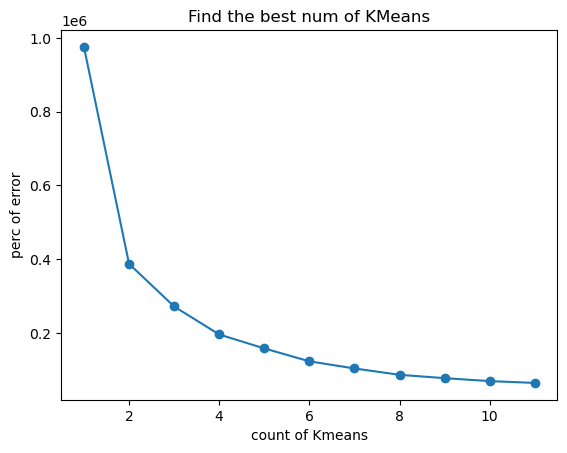

In [77]:
plt.plot(cluster,j,marker='o')
plt.title('Find the best num of KMeans')
plt.xlabel('count of Kmeans')
plt.ylabel('perc of error')

In [78]:
model = KMeans(n_clusters=4)
model.fit(xdata)
pre = model.predict(xdata)

In [79]:
data['k_mean'] = pre

In [80]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,1
197,198,1,32,126,74,2
198,199,1,32,137,18,1


In [81]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
57,58,1,69,44,46,0
59,60,1,53,46,46,0
60,61,1,70,46,56,0
62,63,0,67,47,52,0
63,64,0,54,47,59,0
...,...,...,...,...,...,...
120,121,1,27,67,56,0
121,122,0,38,67,40,0
122,123,0,40,69,58,0
124,125,0,23,70,29,0


In [82]:
df1 = data[data['k_mean']==0]
df2 = data[data['k_mean']==1]
df3 = data[data['k_mean']==2]
df4 = data[data['k_mean']==3]

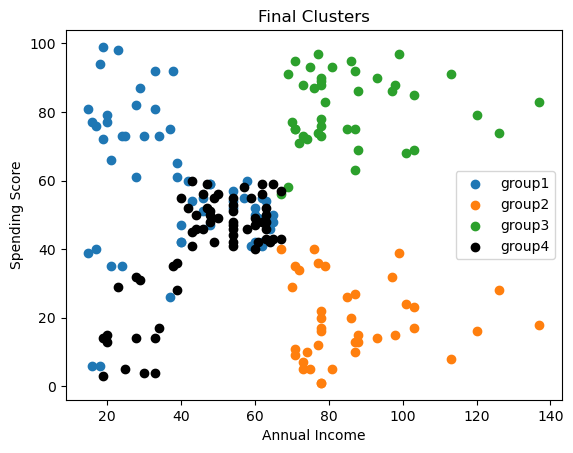

In [83]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('Final Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Data Analysis

C:\Users\hasanein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='count'>

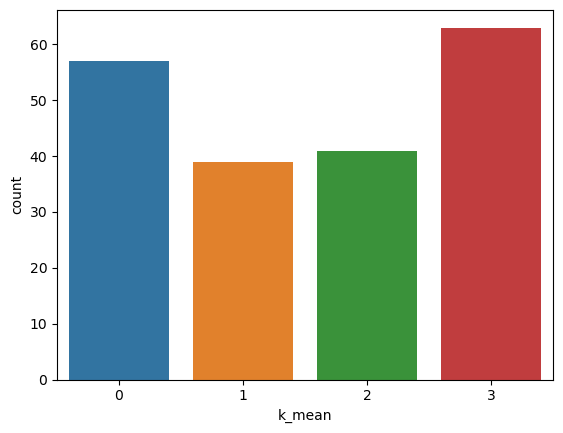

In [84]:
sns.countplot(data.k_mean)

<AxesSubplot:ylabel='k_mean'>

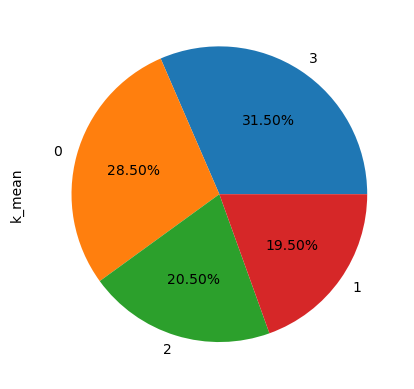

In [85]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%')

C:\Users\hasanein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='Spending Score (1-100)'>

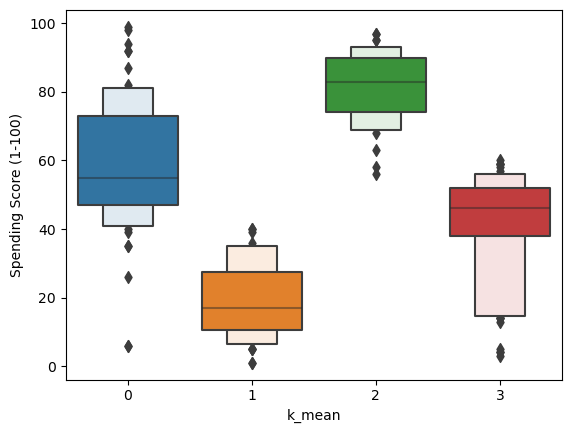

In [86]:
sns.boxenplot(data.k_mean,data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

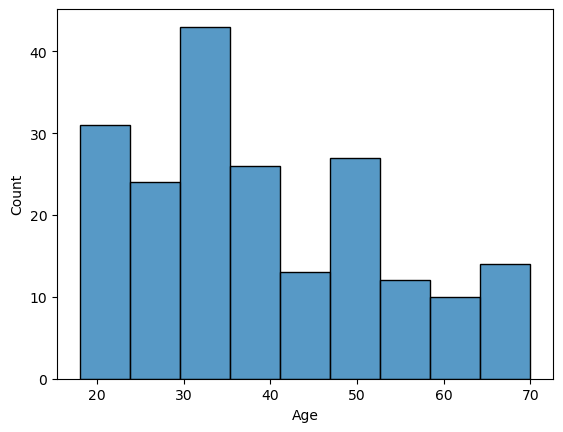

In [87]:
sns.histplot(data.Age)

C:\Users\hasanein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_mean', ylabel='count'>

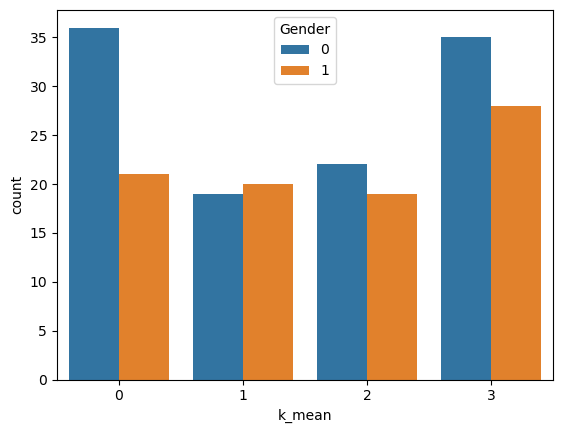

In [88]:
sns.countplot(data.k_mean,hue=data.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

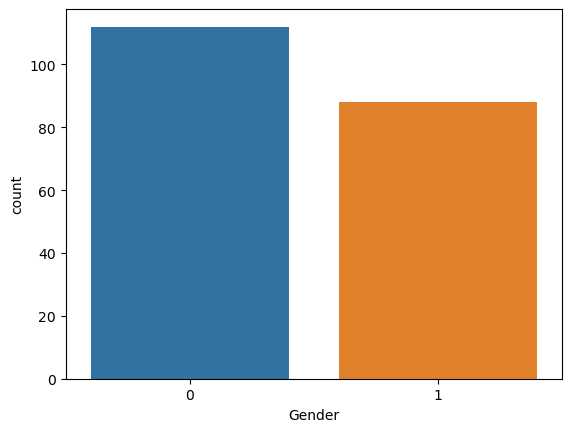

In [89]:
sns.countplot(data=data,x='Gender')